In [22]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
df = pd.read_csv('data/opportunities.csv',low_memory=False)

In [23]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [75]:
def get_year(x):
  date = (x.Opportunity_Created_Date).split("/")
  return int(date[2])

def get_month_str(x):
  month = dt.date(1900, x["Creation Month"], 1).strftime('%B')
  return month[0:3]

def get_month(x):
  date = (x.Opportunity_Created_Date).split("/")
  return int(date[0])

In [24]:
df_dates = df.loc[:,["Stage","Opportunity_Name","Region","Account_Created_Date","Opportunity_Created_Date",\
                    "Last_Activity","Quote_Expiry_Date","Last_Modified_Date","Planned_Delivery_Start_Date",\
                    "Planned_Delivery_End_Date","Month","Delivery_Quarter","Delivery_Year","Actual_Delivery_Date",\
                    "Total_Amount_Currency","Total_Amount"]]
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Stage                        16947 non-null  object 
 1   Opportunity_Name             16947 non-null  object 
 2   Region                       16947 non-null  object 
 3   Account_Created_Date         16947 non-null  object 
 4   Opportunity_Created_Date     16947 non-null  object 
 5   Last_Activity                16947 non-null  object 
 6   Quote_Expiry_Date            16947 non-null  object 
 7   Last_Modified_Date           16947 non-null  object 
 8   Planned_Delivery_Start_Date  16947 non-null  object 
 9   Planned_Delivery_End_Date    16947 non-null  object 
 10  Month                        16947 non-null  object 
 11  Delivery_Quarter             16947 non-null  object 
 12  Delivery_Year                16947 non-null  int64  
 13  Actual_Delivery_

In [25]:
df_dates["Planned_Delivery_End_Date"].value_counts()

3/31/2016     451
6/30/2017     322
2/29/2016     300
9/28/2018     262
6/29/2018     249
             ... 
6/19/2019       1
1/3/2017        1
11/19/2017      1
6/4/2016        1
11/20/2016      1
Name: Planned_Delivery_End_Date, Length: 1017, dtype: int64

In [26]:
df_dates["Actual_Delivery_Date"].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [27]:
df_dates["Last_Activity"].value_counts()

NaT    16947
Name: Last_Activity, dtype: int64

In [28]:
df_dates['Planned_Delivery_Start_Date'] = pd.to_datetime(df_dates['Planned_Delivery_Start_Date'])
df_dates['Planned_Delivery_End_Date'] = pd.to_datetime(df_dates['Planned_Delivery_End_Date'])
df_dates['Quote_Expiry_Date'] = pd.to_datetime(df_dates['Quote_Expiry_Date'])
df_dates['Last_Modified_Date'] = pd.to_datetime(df_dates['Last_Modified_Date'])
df_dates['Last_Activity'] = pd.to_datetime(df_dates['Last_Activity'])
df_dates['Account_Created_Date'] = pd.to_datetime(df_dates['Account_Created_Date'])
df_dates['Actual_Delivery_Date'] = pd.to_datetime(df_dates['Actual_Delivery_Date'])
df_dates['Opportunity_Created_Date'] = pd.to_datetime(df_dates['Opportunity_Created_Date'])

df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Stage                        16947 non-null  object        
 1   Opportunity_Name             16947 non-null  object        
 2   Region                       16947 non-null  object        
 3   Account_Created_Date         16947 non-null  datetime64[ns]
 4   Opportunity_Created_Date     16947 non-null  datetime64[ns]
 5   Last_Activity                0 non-null      datetime64[ns]
 6   Quote_Expiry_Date            12322 non-null  datetime64[ns]
 7   Last_Modified_Date           16947 non-null  datetime64[ns]
 8   Planned_Delivery_Start_Date  16947 non-null  datetime64[ns]
 9   Planned_Delivery_End_Date    16872 non-null  datetime64[ns]
 10  Month                        16947 non-null  object        
 11  Delivery_Quarter             16947 non-nu

In [29]:
df_dates.head()

,Stage,Opportunity_Name,Region,Account_Created_Date,Opportunity_Created_Date,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,Total_Amount_Currency,Total_Amount
0,Closed Lost,Opportunity_Name_12598,EMEA,2015-06-16,2015-12-07,NaT,2016-01-30,2016-06-13,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,EUR,5272800.0
1,Closed Won,Opportunity_Name_12600,EMEA,2015-06-16,2015-12-07,NaT,2016-01-20,2016-01-15,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,EUR,48230.0
2,Closed Won,Opportunity_Name_469,Americas,2015-04-21,2015-12-08,NaT,2016-09-30,2016-09-29,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,USD,83865.6
3,Closed Lost,Opportunity_Name_415,Americas,2013-07-27,2015-12-08,NaT,NaT,2018-03-27,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,USD,7421881.5
4,Closed Lost,Opportunity_Name_851,Americas,2013-07-27,2015-12-08,NaT,2017-06-02,2018-03-27,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,USD,13357192.5


In [30]:
df_dates_region = df_dates.groupby(["Delivery_Year","Region"]).agg({"Stage":"count"}).unstack().fillna(0)
df_dates_region.columns = ["APAC","Americas","EMEA","Japan","Middle East"]
df_dates_region

,APAC,Americas,EMEA,Japan,Middle East
Delivery_Year,,,,,
2016,550.0,712.0,964.0,2132.0,13.0
2017,1273.0,1412.0,1750.0,1806.0,77.0
2018,1336.0,1704.0,1852.0,860.0,78.0
2019,101.0,116.0,98.0,83.0,16.0
2020,2.0,1.0,0.0,11.0,0.0


<AxesSubplot:xlabel='Delivery_Year'>

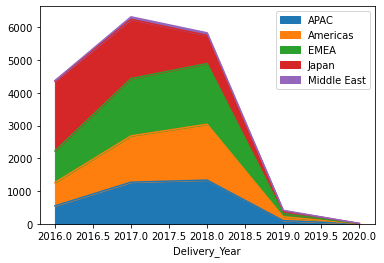

In [31]:
df_dates_region.plot.area()

In [32]:
df_dates.groupby(["Delivery_Quarter"]).agg({"Stage":"count"})

,Stage
Delivery_Quarter,
Q1,4317
Q2,4443
Q3,4043
Q4,4144


In [33]:
df.loc[df["Opportunity_Name"]=="Opportunity_Name_0",["Delivery_Quarter","Planned_Delivery_Start_Date"]]

,Delivery_Quarter,Planned_Delivery_Start_Date
2321,Q4,12/1/2016
2322,Q4,11/1/2016
2323,Q4,10/1/2016
2324,Q3,9/1/2016
2325,Q3,8/1/2016
2326,Q3,7/1/2016
2327,Q2,6/1/2016


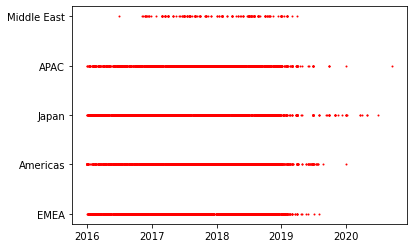

In [34]:
plt.scatter(df_dates["Planned_Delivery_Start_Date"],df_dates["Region"], s =1, c = 'red')

In [35]:
df_date_amount = df_dates.loc[(df_dates["Total_Amount_Currency"] == "USD") & (df_dates["Total_Amount"] > 1),\
                              ["Total_Amount","Planned_Delivery_Start_Date","Stage"]]
df_date_amount["Total_Amount_Log"] = np.log(df_date_amount["Total_Amount"])
df_date_amount.nlargest(10,"Total_Amount")

,Total_Amount,Planned_Delivery_Start_Date,Stage,Total_Amount_Log
16682,315000081.9,2016-07-01,Closed Lost,19.568083
16616,256201545.6,2016-05-02,Closed Lost,19.361475
7364,158738214.0,2018-06-01,Closed Lost,18.882767
3667,153978825.0,2017-08-14,Closed Lost,18.852326
2806,123750059.4,2017-01-15,Closed Lost,18.633774
16317,102399897.6,2016-01-01,Closed Lost,18.444396
16408,96001920.0,2016-04-01,Closed Lost,18.379879
16409,96001920.0,2016-07-01,Closed Lost,18.379879
2298,94499905.5,2016-09-19,Closed Lost,18.364109
15467,92474931.5,2019-07-01,Closed Lost,18.342448


<AxesSubplot:xlabel='Planned_Delivery_Start_Date'>

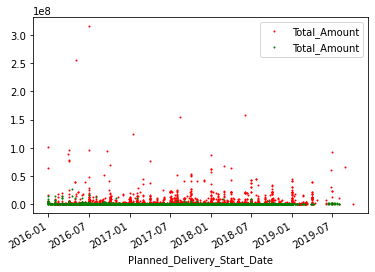

In [36]:
df_date_amount_lost = df_date_amount[df_date_amount["Stage"]=="Closed Lost"]
df_date_amount_won = df_date_amount[df_date_amount["Stage"]=="Closed Won"]

show = df_date_amount_lost.plot(x="Planned_Delivery_Start_Date",y="Total_Amount",marker='o',linestyle='none',color='red',ms=1)
df_date_amount_won.plot(x="Planned_Delivery_Start_Date",y="Total_Amount",marker='o',linestyle='none',color='green',ms=1,ax=show)

<AxesSubplot:xlabel='Planned_Delivery_Start_Date'>

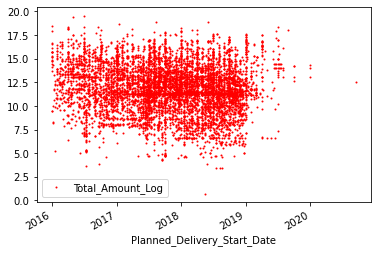

In [37]:
df_date_amount.plot(x="Planned_Delivery_Start_Date",y="Total_Amount_Log",marker='o',linestyle='none',color='red',ms=1)

In [38]:
df_dates.head()

,Stage,Opportunity_Name,Region,Account_Created_Date,Opportunity_Created_Date,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,Total_Amount_Currency,Total_Amount
0,Closed Lost,Opportunity_Name_12598,EMEA,2015-06-16,2015-12-07,NaT,2016-01-30,2016-06-13,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,EUR,5272800.0
1,Closed Won,Opportunity_Name_12600,EMEA,2015-06-16,2015-12-07,NaT,2016-01-20,2016-01-15,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,EUR,48230.0
2,Closed Won,Opportunity_Name_469,Americas,2015-04-21,2015-12-08,NaT,2016-09-30,2016-09-29,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,USD,83865.6
3,Closed Lost,Opportunity_Name_415,Americas,2013-07-27,2015-12-08,NaT,NaT,2018-03-27,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,USD,7421881.5
4,Closed Lost,Opportunity_Name_851,Americas,2013-07-27,2015-12-08,NaT,2017-06-02,2018-03-27,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,USD,13357192.5


In [39]:
df_show = df_dates.count().to_frame().reset_index()
df_show.columns = ["Columna","Cantidad de Registros con datos validos"]
df_final = df_show[df_show["Columna"].isin(["Account_Created_Date","Opportunity_Created_Date",\
                   "Last_Activity","Quote_Expiry_Date","Last_Modified_Date","Planned_Delivery_Start_Date",\
                   "Planned_Delivery_End_Date","Month","Delivery_Quarter","Delivery_Year","Actual_Delivery_Date"])]
df_final

,Columna,Cantidad de Registros con datos validos
3,Account_Created_Date,16947
4,Opportunity_Created_Date,16947
5,Last_Activity,0
6,Quote_Expiry_Date,12322
7,Last_Modified_Date,16947
8,Planned_Delivery_Start_Date,16947
9,Planned_Delivery_End_Date,16872
10,Month,16947
11,Delivery_Quarter,16947
12,Delivery_Year,16947


In [40]:
table = ff.create_table(df_final)
#py.iplot(table)

In [61]:
df_dates["Creation Year"] = df_dates["Opportunity_Created_Date"].dt.year
df_dates["Creation Month"] = df_dates["Opportunity_Created_Date"].dt.month

df_dates_show = df_dates.groupby(["Creation Year","Opportunity_Name"]).agg({"Stage":["first","count"]}).reset_index()
df_dates_show.columns = ["Year","Opportunity","Stage","Count"]
df_dates_show = df_dates_show.groupby(["Year","Stage"]).agg({"Count":"sum"}).reset_index()
df_dates_show

,Year,Stage,Count
0,2013,Closed Lost,1
1,2014,Closed Lost,23
2,2014,Closed Won,17
3,2015,Closed Lost,736
4,2015,Closed Won,276
5,2016,Closed Lost,2257
6,2016,Closed Won,2098
7,2017,Closed Lost,2551
8,2017,Closed Won,4369
9,2017,Proposal,1


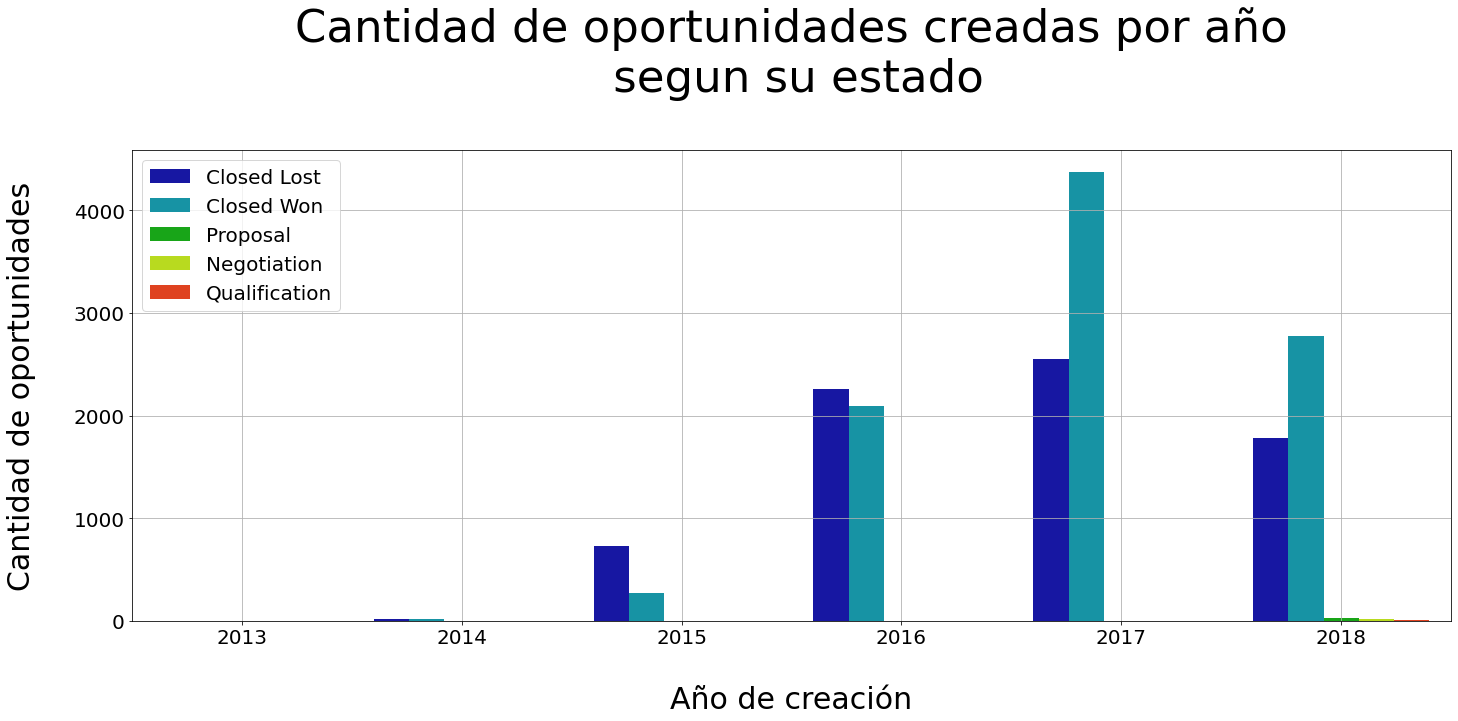

In [123]:
fig,ax=plt.subplots(figsize=(20,10))

g = sns.barplot(ax=ax, \
                data=df_dates_show, \
                x='Year', \
                y='Count', \
                palette='nipy_spectral', \
                alpha=1, \
                hue='Stage')
g.set_title('Cantidad de oportunidades creadas por año\n segun su estado\n',size=45)
g.set_xlabel('\nAño de creación',size=30)
g.set_ylabel('Cantidad de oportunidades\n',size=30)

plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=1,fontsize=20,loc='upper left')
#plt.savefig("pngs/op-cant-anio.png")
plt.show()

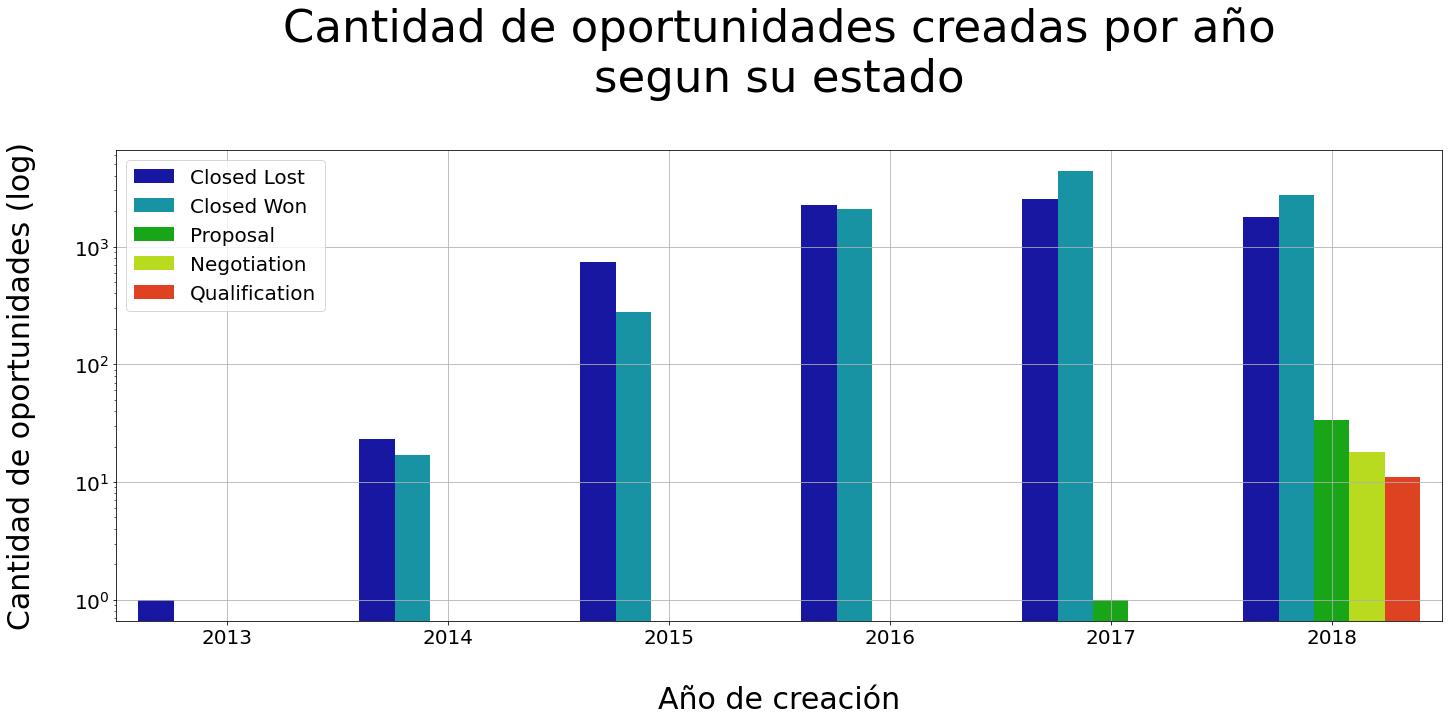

In [124]:
fig,ax=plt.subplots(figsize=(20,10))

g = sns.barplot(ax=ax, \
                data=df_dates_show, \
                x='Year', \
                y='Count', \
                palette='nipy_spectral', \
                alpha=1, \
                hue='Stage')
g.set_title('Cantidad de oportunidades creadas por año\nsegun su estado\n',size=45)
g.set_xlabel('\nAño de creación',size=30)
g.set_ylabel('Cantidad de oportunidades (log)\n',size=30)

plt.grid(True)
plt.yscale("log")
plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=1,fontsize=20,loc='upper left')
#plt.savefig("pngs/op-cant-anio-log.png")
plt.show()

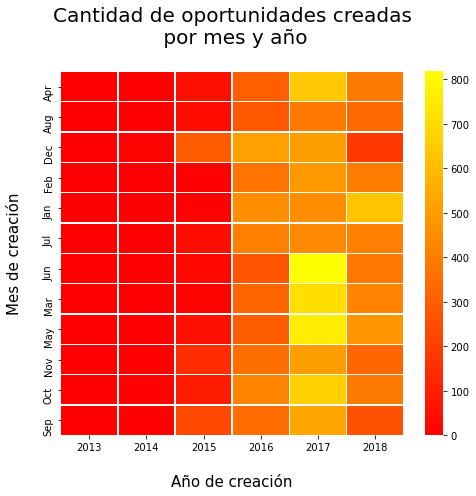

In [111]:
df_dates_heatmap = df_dates.groupby(["Opportunity_Name"]).agg({"Stage":"count","Creation Month":"first", "Creation Year":"first"}).reset_index()

df_dates_heatmap = df_dates_heatmap.groupby(["Creation Month", "Creation Year"]).agg({"Stage":"sum"}).reset_index()
df_dates_heatmap = df_dates_heatmap.sort_values(by=['Creation Month', 'Creation Year'],ascending=False)
df_dates_heatmap["Creation Month"] = df_dates_heatmap.apply(get_month_str, axis=1)
df_dates_heatmap

df_dates_heatmap = df_dates_heatmap.pivot("Creation Month", "Creation Year", "Stage").fillna(0)
df_dates_heatmap
ax = sns.heatmap(df_dates_heatmap,linewidths=.5,cmap="autumn")

ax.set_title('Cantidad de oportunidades creadas\n por mes y año\n',size=20)
ax.set_xlabel('\nAño de creación',size=15)
ax.set_ylabel('Mes de creación\n',size=15)

plt.rcParams["figure.figsize"] = (7,7)
plt.tight_layout()
#plt.savefig("pngs/heatmap-anio-mes.png")
plt.show()